Tải bộ dữ liệu WELFake

In [1]:
!gdown 1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3

Downloading...
From (original): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3
From (redirected): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3&confirm=t&uuid=cf3e85da-310e-45f4-ac70-23e0b60a5132
To: /content/WELFake_Dataset.csv
100% 245M/245M [00:04<00:00, 57.6MB/s]


In [2]:
import pandas as pd

df = pd.read_csv("/content/WELFake_Dataset.csv")
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


Xóa các kí tự null và nối cột title vào cột test

In [3]:
df.dropna(subset = ['text', 'title'], inplace = True)
df['text'] = df['title'] + ' ' + df['text']
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...","Bobby Jindal, raised Hindu, uses story of Chri...",0
4,4,SATAN 2: Russia unvelis an image of its terrif...,SATAN 2: Russia unvelis an image of its terrif...,1
5,5,About Time! Christian Group Sues Amazon and SP...,About Time! Christian Group Sues Amazon and SP...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,Russians steal research on Trump in hack of U....,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,Trump tussle gives unpopular Mexican leader mu...,0


### Original

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Embedding, Input
from tensorflow.keras.models import Sequential
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
X_train.shape, y_train.shape

((57229,), (57229,))

In [6]:
X_test.shape, y_test.shape

((14308,), (14308,))

Tokenizer data

Xây dựng và huấn luyện mô hình

In [12]:
max_words = 20000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history = model.fit(X_train_pad, y_train, epochs=30, batch_size=64, validation_data=(X_test_pad, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.7881 - loss: 0.4186 - val_accuracy: 0.9342 - val_loss: 0.1852 - learning_rate: 0.0010
Epoch 2/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.9252 - loss: 0.2025 - val_accuracy: 0.8672 - val_loss: 0.2948 - learning_rate: 0.0010
Epoch 3/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9366 - loss: 0.1705 - val_accuracy: 0.9423 - val_loss: 0.1678 - learning_rate: 0.0010
Epoch 4/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9027 - loss: 0.2329 - val_accuracy: 0.9010 - val_loss: 0.2517 - learning_rate: 0.0010
Epoch 5/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8721 - loss: 0.2909 - val_accuracy: 0.9243 - val_loss: 0.2148 - learning_rate: 0.0010
Epoch 6/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9095 - loss: 0.2238 - val_accuracy: 0.8932 - val_loss: 0.2594 - learning_rate: 0.0010
Epoch 7/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9292 - loss: 0.1909

Vẽ đồ thị học accuracy và loss 

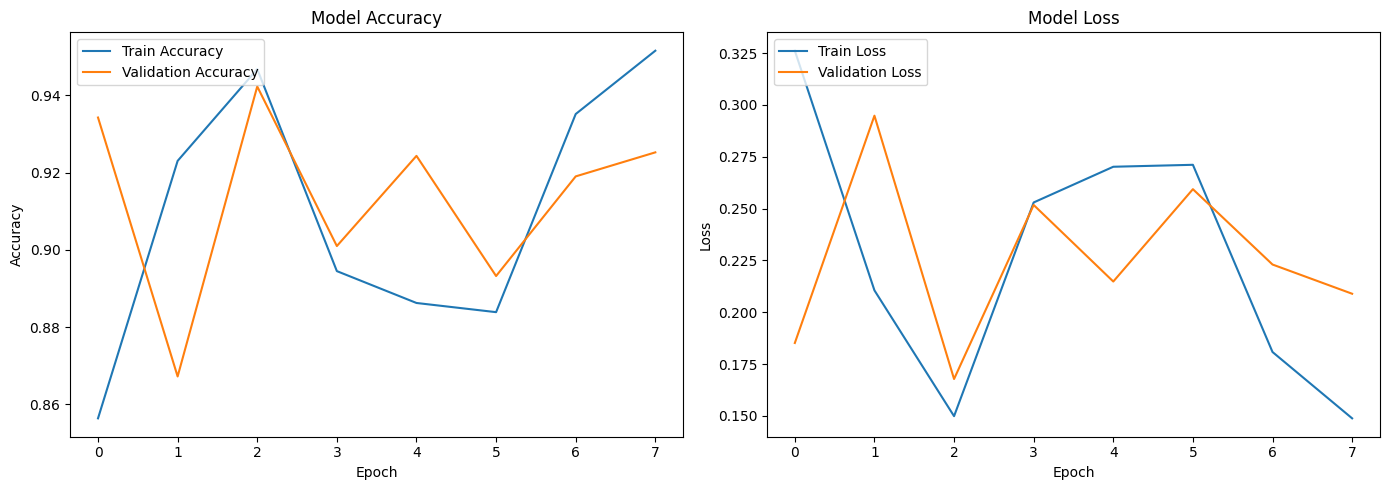

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình 

In [14]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Accuracy: 0.9422700587084148
Precision: 0.9496979064212449
Recall: 0.9352428393524284
F1-score: 0.942414947016174
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7081
           1       0.95      0.94      0.94      7227

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

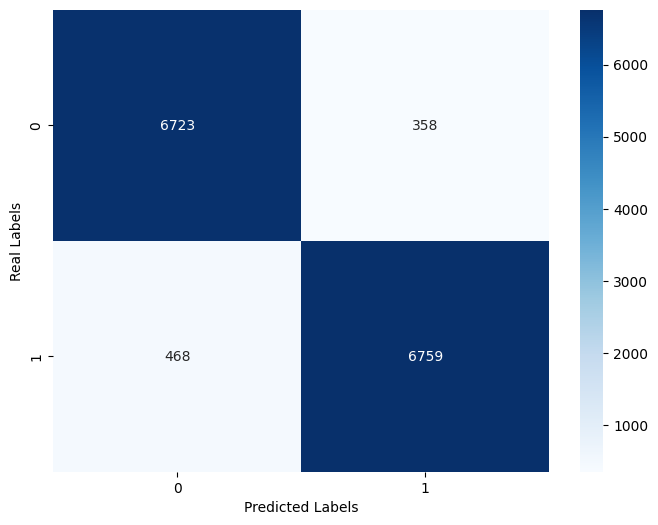

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

### SR

Thực hiện tăng cường dữ liệu bằng cách thay thế từ đồng nghĩa (SR)

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def replace_synonyms(text):
    words = word_tokenize(text)
    replaced_text = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            replaced_text.append(synonym.replace('_', ' '))
        else:
            replaced_text.append(word)
    return ' '.join(replaced_text)

def remove_function_words(text):
    words = word_tokenize(text)
    filtered_text = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def preprocess_txt(text, use_synonyms=False, use_fwd=False):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    if use_synonyms:
        text = replace_synonyms(text)

    if use_fwd:
        text = remove_function_words(text)

    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens]

    unique_tokens = []
    for token in tokens:
        if token not in unique_tokens:
            unique_tokens.append(token)

    preprocessed_text = ' '.join(unique_tokens)
    return preprocessed_text

df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=True, use_fwd=False) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(57229,)

In [19]:
X_test.shape

(14308,)

Tokenizer data

Xây dựng và huấn luyện mô hình 

In [20]:
max_words = 20000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history = model.fit(X_train_pad, y_train, epochs=30, batch_size=64, validation_data=(X_test_pad, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.6831 - loss: 0.5591 - val_accuracy: 0.7910 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 2/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8589 - loss: 0.3374 - val_accuracy: 0.8795 - val_loss: 0.3113 - learning_rate: 0.0010
Epoch 3/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9022 - loss: 0.2614 - val_accuracy: 0.8836 - val_loss: 0.2931 - learning_rate: 0.0010
Epoch 4/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9125 - loss: 0.2336 - val_accuracy: 0.8982 - val_loss: 0.2709 - learning_rate: 0.0010
Epoch 5/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9387 - loss: 0.1721 - val_accuracy: 0.8911 - val_loss: 0.2697 - learning_rate: 0.0010
Epoch 6/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8693 - loss: 0.3147 - val_accuracy: 0.8048 - val_loss: 0.4073 - learning_rate: 0.0010
Epoch 7/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8835 - loss: 0.2871

Vẽ đồ thị học accuracy và loss 

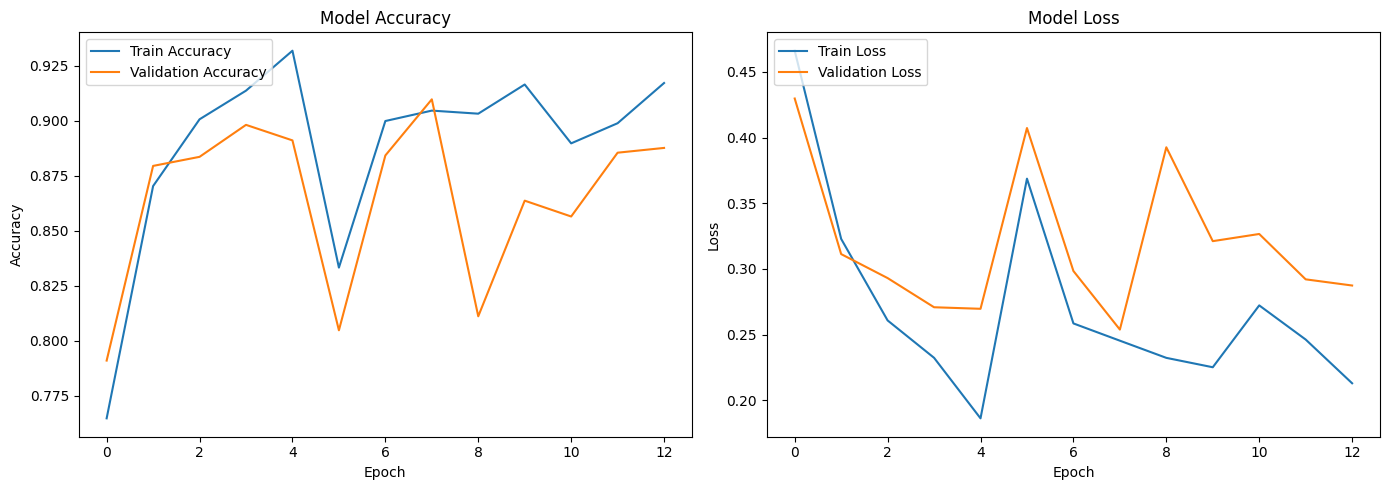

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình 

In [22]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
Accuracy: 0.9097707576181158
Precision: 0.9100580270793037
Recall: 0.911443199114432
F1-score: 0.9107500864154856
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7081
           1       0.91      0.91      0.91      7227

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

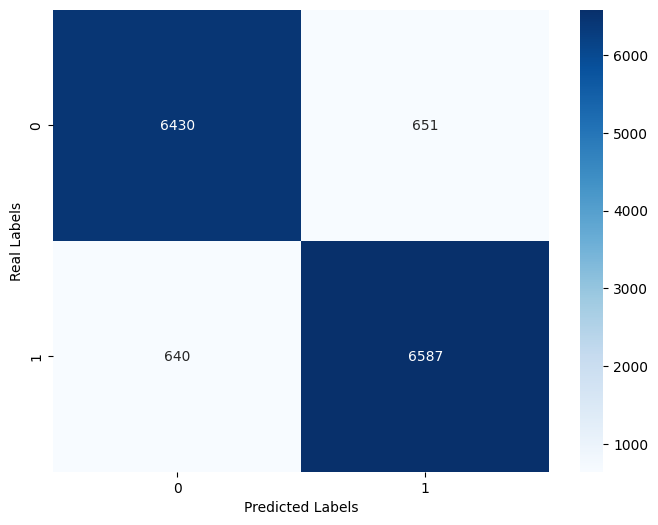

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

### FWD

Thực hiện tăng cường dữ liệu xóa các từ không cần thiết (FWD)

In [24]:
df['preprocessed_text'] = df['text'].apply(lambda x: preprocess_txt(x, use_synonyms=False, use_fwd=True) if isinstance(x, str) else "")

X = df['preprocessed_text']
y = df['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape

(14308,)

Tokenizer data

Xây dựng và huấn luyện mô hình

In [26]:
max_words = 20000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

history = model.fit(X_train_pad, y_train, epochs=30, batch_size=64, validation_data=(X_test_pad, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


895/895 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.7522 - loss: 0.4772 - val_accuracy: 0.8348 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 2/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8511 - loss: 0.3463 - val_accuracy: 0.8605 - val_loss: 0.3432 - learning_rate: 0.0010
Epoch 3/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8879 - loss: 0.2945 - val_accuracy: 0.8796 - val_loss: 0.3028 - learning_rate: 0.0010
Epoch 4/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.8258 - loss: 0.3684 - val_accuracy: 0.8607 - val_loss: 0.3388 - learning_rate: 0.0010
Epoch 5/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9087 - loss: 0.2434 - val_accuracy: 0.8973 - val_loss: 0.2699 - learning_rate: 0.0010
Epoch 6/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9419 - loss: 0.1653 - val_accuracy: 0.8891 - val_loss: 0.2909 - learning_rate: 0.0010
Epoch 7/30
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9479 - loss: 0.1557

Vẽ đồ thị học accuracy và loss

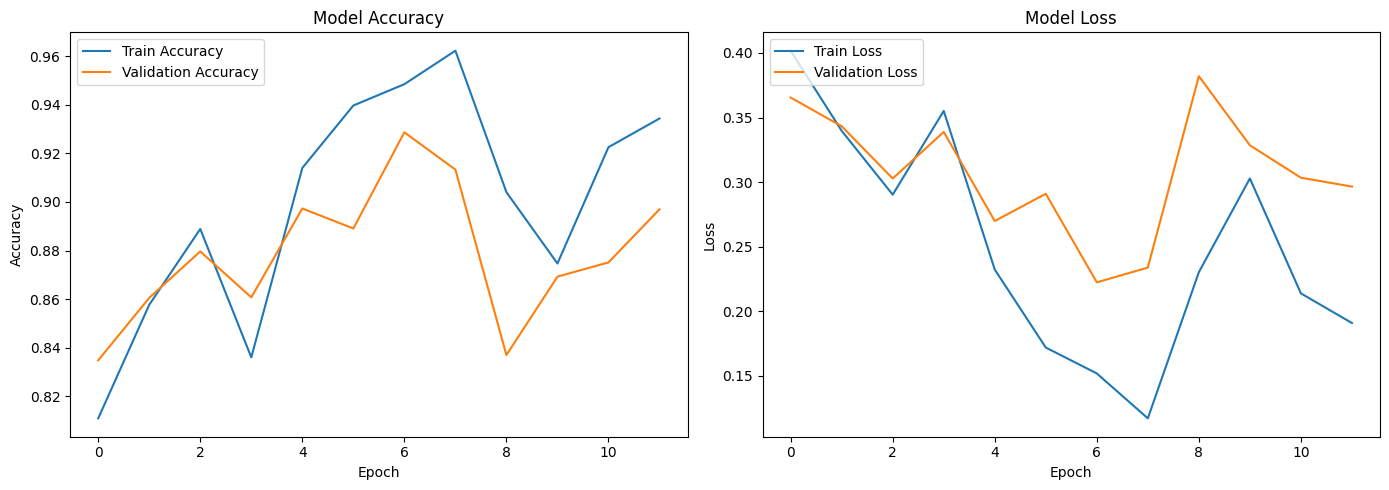

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Đánh giá mô hình 

In [28]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
Accuracy: 0.9287112105116019
Precision: 0.9438009438009438
Recall: 0.91324200913242
F1-score: 0.9282700421940928
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      7081
           1       0.94      0.91      0.93      7227

    accuracy                           0.93     14308
   macro avg       0.93      0.93      0.93     14308
weighted avg       0.93      0.93      0.93     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

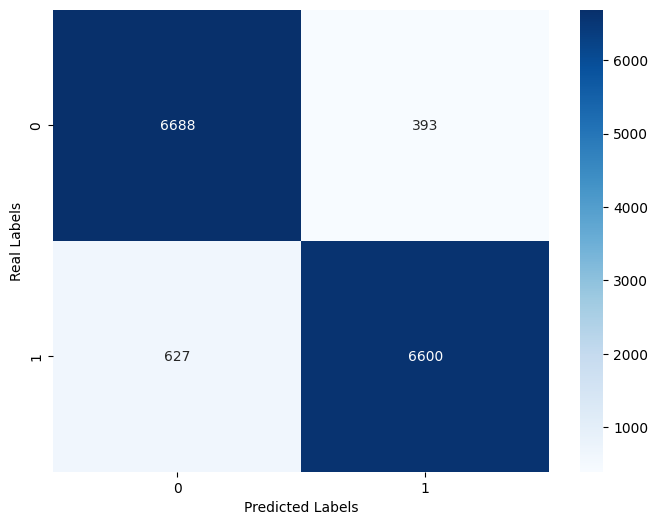

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')